# Моделирование гонки вооружений между двумя странами

In [1]:
import numpy as np
from scipy.constants import g, pi
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy.integrate import solve_ivp

In [2]:
%matplotlib notebook
style = {'description_width': 'initial'}

## $ \frac{d M_1}{d t} = \alpha_1(t) M_2 - \beta_1(t)  M_1 + \gamma_1(t)$

## $ \frac{d M_2}{d t} = \alpha_2(t) M_1 - \beta_2(t) M_2 + \gamma_2(t)$

## $ \alpha_1, \alpha_2 $ - скорости наращивания вооружений

## $\beta_1, \beta_2 $ - скорости старения вооружений

## $\gamma_1, \gamma_2$ - уровень настороженности


## простейшая модель

<IPython.core.display.Javascript object>


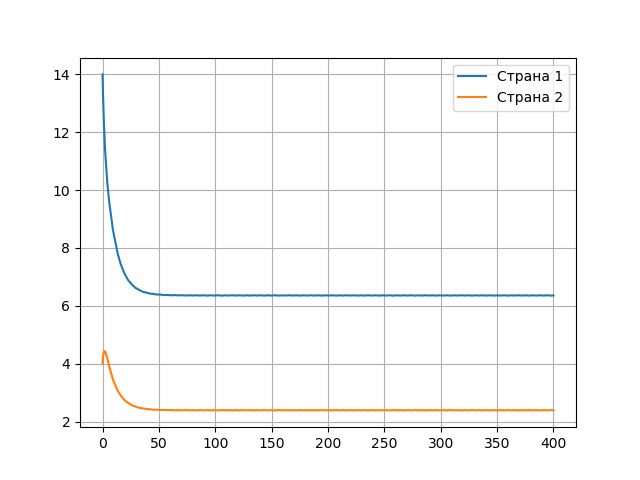

<IPython.core.display.Javascript object>


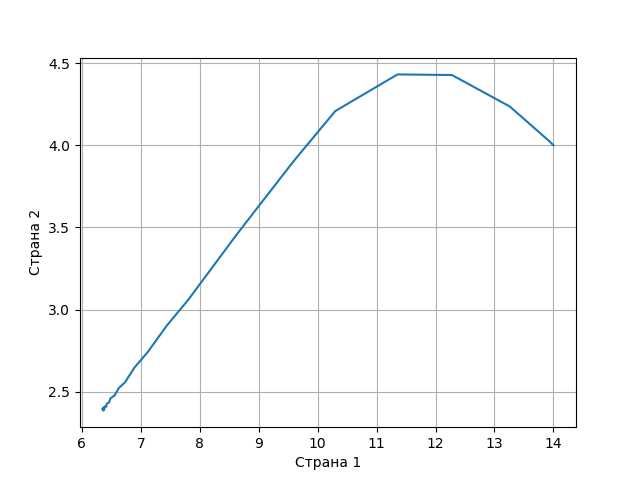

In [11]:
def gun_run_model(t, y, a_1, a_2, b_1, b_2, g_1, g_2):
    return np.array([a_1*y[1] - b_1*y[0] + g_1, a_2*y[0] - b_2*y[1] + g_2])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()
ax.legend(['Страна 1', 'Страна 2'])

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.grid()
plt.xlabel('Страна 1')


def gun_run_plotter(a_1, a_2, b_1, b_2, g_1, g_2, max_time, start_value_N, start_value_M):
    ax.clear()
    ax1.clear()
    ax1.grid()
    ax.grid()
    plt.xlabel('Страна 1')
    plt.ylabel('Страна 2')

    solve = solve_ivp(lambda t, y: gun_run_model(t, y, a_1, a_2, b_1, b_2, g_1, g_2),
                      (0,max_time), [start_value_N, start_value_M], method = 'RK23')
    
    l1, = ax.plot(solve['t'], solve['y'][0])
    l2, = ax.plot(solve['t'], solve['y'][1])
    ax1.plot(solve['y'][0], solve['y'][1])
    ax.legend((l1, l2), ('Страна 1', 'Страна 2'))

In [12]:
interact(gun_run_plotter,
    a_1=widgets.FloatSlider(min=0, max=1, step=0.001, value=0.4),
    a_2=widgets.FloatSlider(min=0, max=1, step=0.001, value=0.4),
    b_1=widgets.FloatSlider(min=0, max=1, step=0.001, value=0.4),
    b_2=widgets.FloatSlider(min=0, max=1, step=0.001, value=0.4),
    g_1=widgets.FloatSlider(min=0, max=1, step=0.001, value=0.4),
    g_2=widgets.FloatSlider(min=0, max=1, step=0.001, value=0.4),
    max_time=widgets.IntSlider(min=4, max=400, step=1, value=100),
    start_value_N=widgets.IntSlider(min=2, max=20, step=1, value=10,style = style),
    start_value_M=widgets.IntSlider(min=2, max=20, step=1, value=10,style = style)
);

interactive(children=(FloatSlider(value=0.4, description='a_1', max=1.0, step=0.001), FloatSlider(value=0.4, d…

## Усложнение модели

<IPython.core.display.Javascript object>


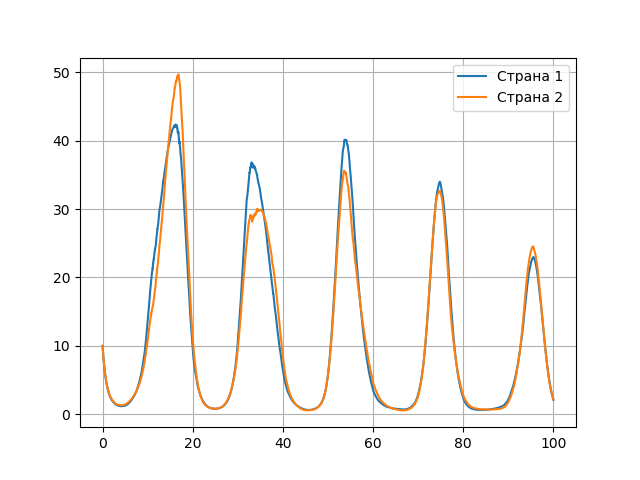

<IPython.core.display.Javascript object>


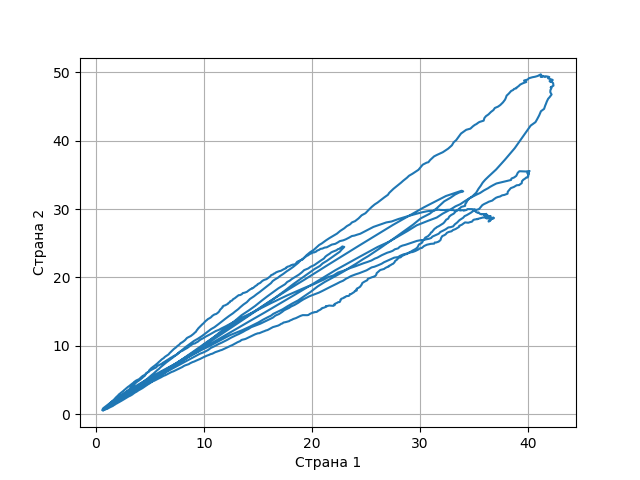

In [62]:
def gun_run_model1(t, y, a_1, a_2, b_1, b_2, g_1, g_2):
    return np.array([a_1(t)*y[1] - b_1(t)*y[0] + g_1(y,t), a_2(t)*y[0] - b_2(t)*y[1] + g_2(y,t)])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.grid()
ax.legend(['Страна 1', 'Страна 2'])

fig1 = plt.figure()
ax1 = fig1.add_subplot(111)
ax1.grid()
plt.xlabel('Страна 1')


def gun_run_plotter1(a_1, a_2, b_1, b_2, g_1, g_2, max_time, start_value_N, start_value_M):
    ax.clear()
    ax1.clear()
    ax1.grid()
    ax.grid()
    plt.xlabel('Страна 1')
    plt.ylabel('Страна 2')

    solve = solve_ivp(lambda t, y: gun_run_model1(t, y, a_1, a_2, b_1, b_2, g_1, g_2),
                      (0,max_time), [start_value_N, start_value_M], method = 'RK23')
    
    l1, = ax.plot(solve['t'], solve['y'][0])
    l2, = ax.plot(solve['t'], solve['y'][1])
    ax1.plot(solve['y'][0], solve['y'][1])
    ax.legend((l1, l2), ('Страна 1', 'Страна 2'))

In [63]:
def c1(t):
    return abs((t%20 - 10))/10

def c2(t):
    return abs((t%11 - 5.5))/5.5

def f1(t):
    return 1-abs((t%20 - 10))/10

def f2(t):
    return 1-abs((t%11 - 5.5))/5.5

def g1(y,t):
    return (y[1]-y[0])*(1+np.random.randn())

def g1_1(y,t):
    return y[1]-y[0]

def g2(y,t):
    return (y[0]-y[1])*(1+np.random.randn())

def g2_1(y,t):
    return y[0]-y[1]

def g1_2(y,t):
    return 0

def g2_2(y,t):
    return 0

In [64]:
interact(gun_run_plotter1,
    a_1=[f1, f2],
    a_2=[f1, f2],
    b_1=[c1, c2],
    b_2=[c1, c2],
    g_1=[g1, g1_1, g1_2],
    g_2=[g2, g2_1, g2_2],
    max_time=widgets.IntSlider(min=4, max=400, step=1, value=100),
    start_value_N=widgets.IntSlider(min=2, max=20, step=1, value=10,style = style),
    start_value_M=widgets.IntSlider(min=2, max=20, step=1, value=10,style = style)
);

interactive(children=(Dropdown(description='a_1', options=(<function f1 at 0x0000019835D26BF8>, <function f2 a…